# ネットワーク拡散

In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
#from IPython.display import SVG, display
import copy
%matplotlib inline

## グラフの描画

In [2]:
def color_01(color_bit):
    color = []
    for i in color_bit:
        if i:
            color.append("red")
        else:
            color.append("gray")
    return color

In [3]:
def draw_graph(adj_mat, nodes_name, pos_in, colors=None):
    G = nx.Graph()
    G.add_nodes_from(nodes_name)
    edges = []
    for hi, hv  in enumerate(adj_mat):
        for wi, wv in enumerate(hv):
            if(wv):
                edges.append((nodes_name[hi], nodes_name[wi]))
    G.add_edges_from(edges)
    colors = color_01(colors)
    if not pos_in:
        pos_in = nx.spring_layout(G)
        
    fig, ax = plt.subplots(figsize=(10, 10))
    nx.draw_networkx(G, pos_in, node_color = colors, with_labels=True)
    plt.axis("off")
    plt.show()
    return pos_in

## ランダムに隣接行列を作る

In [4]:
def prob_01(prob_1):
    if random.random() <= prob_1:
        return 1
    else:
        return 0

In [5]:
def to_adj_matrix(n, edge):
    m =[[0]*n for i in range(n)]
    for path in edge:
        m[path[0]][path[1]] = 1
        m[path[1]][path[0]] = 1
    return np.array(m)

In [6]:
def adj_matrix(n, join_prob):
    edge = []
    for i in range(n):
        for j in range(i+1, n):
            if prob_01(join_prob):
                edge.append([i,j])
    return [to_adj_matrix(n, edge), edge]

## ネットワーク拡散

In [7]:
def diffusion(adj, a_gain, b_gain, color):
    #閾値
    q = b_gain / (a_gain+b_gain)
    
    update_color = []
    
    for i in range(len(adj)):
        if color[i] == 0:
            d = 0
            a_count = 0
            for j in range(len(adj[i])):
                if adj[i][j] == 1:
                    d += 1
                    if color[j] == 1:
                        a_count += 1

            if d != 0:
                p = a_count / d
            else:
                p = 0
            #print(p,q)
            if p >= q:
                update_color.append(1)
            else:
                update_color.append(0)
        else:
            update_color.append(0)
            
    for i in range(len(color)):
        if update_color[i] == 1:
            if color[i] == 1:
                color[i] = 0
            else:
                color[i] = 1
    return color

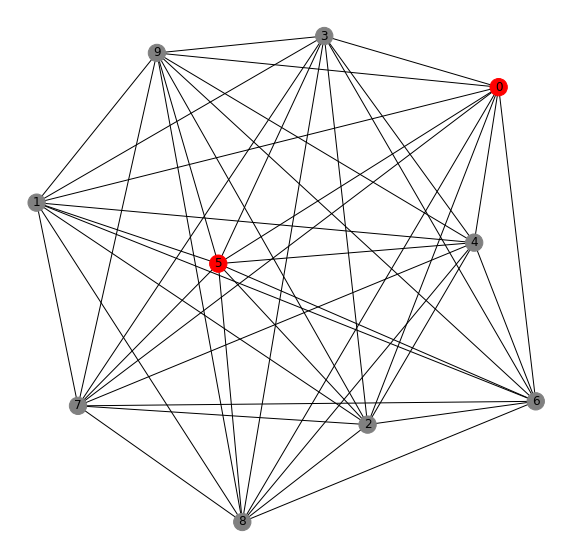

In [18]:
#隣接行列
n = 10
g = adj_matrix(n, 1)[0]
#draw_graph(g, np.array(['0', '1', '2', '3', '4']), ["blue","blue","blue","red","red"])
nodes_name = np.array([str(i) for i in range(n)])
start_nodes = [0 for i in range(n)]
#初期ノード設定
start_node_num = 2

for i in random.sample([i for i in range(n)], start_node_num):
    start_nodes[i] = 1


pos = draw_graph(g, nodes_name, False, start_nodes)
for i in range(100):
    pre_color = copy.copy(start_nodes)
    color = diffusion(g, 3, 2, start_nodes)
    if pre_color != color:
        draw_graph(g, nodes_name, pos, color)
    else:
        break

In [9]:
#n:ノード数
#start_node_num:初期ノード数
#join_prob:ノード結合確率
#A戦略利得:a_gain
#B戦略利得:b_gain

def cascade_model(n, start_node_num, join_prob, a_gain, b_gain):
    g = adj_matrix(n, join_prob)[0]
    nodes_name = np.array([str(i) for i in range(n)])
    
    start_nodes = [0 for i in range(n)]
    for i in random.sample([i for i in range(n)], start_node_num):
        start_nodes[i] = 1

    pos = draw_graph(g, nodes_name, False, start_nodes)
    color = copy.copy(start_nodes)
    for i in range(100):
        pre_color = copy.copy(color)
        color = diffusion(g, a_gain, b_gain, start_nodes)
        if pre_color != color:
            draw_graph(g, nodes_name, pos, color)
        else:
            break

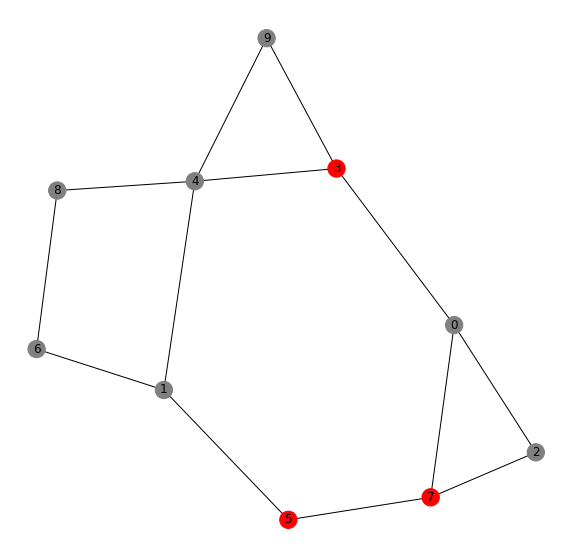

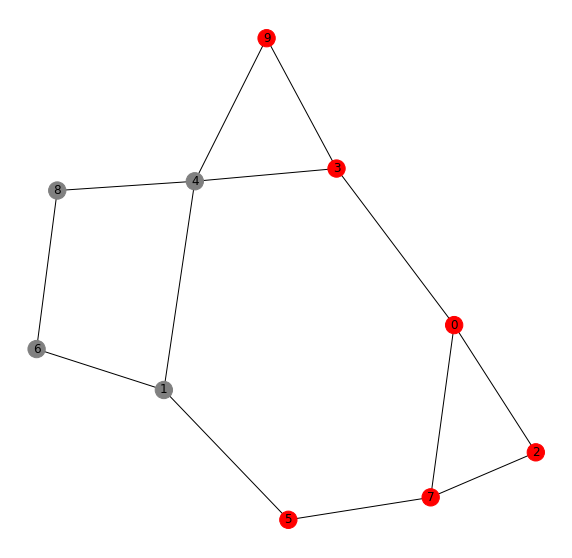

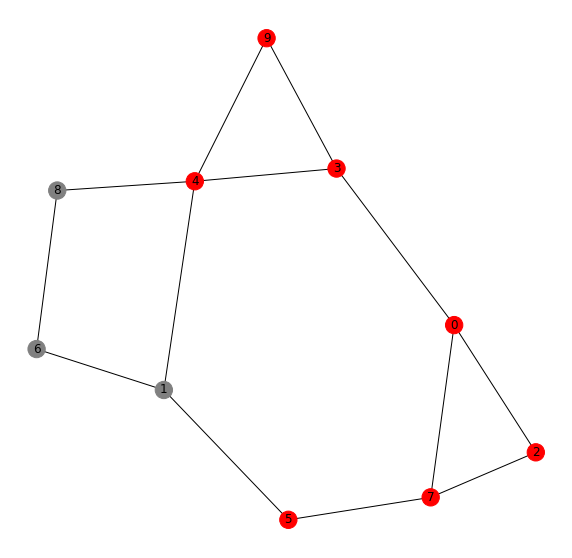

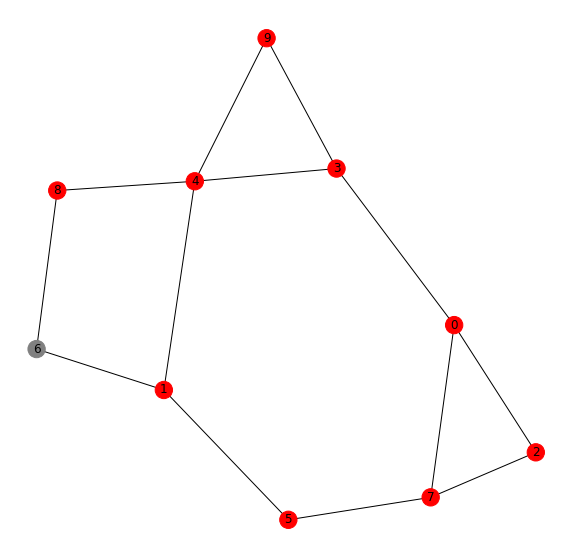

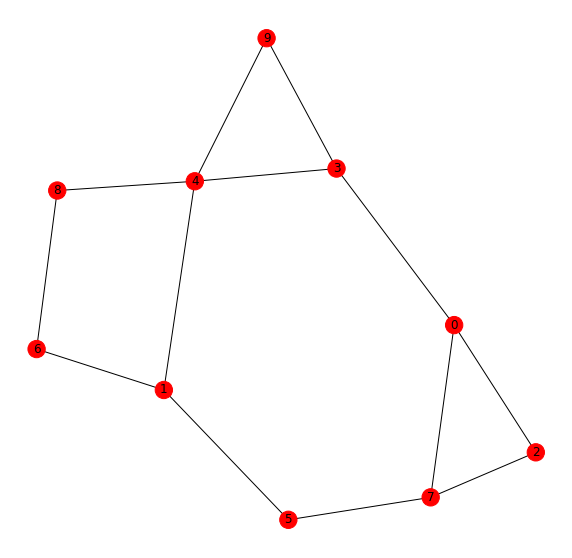

In [10]:
cascade_model(10, 3, 0.3, 3, 3)

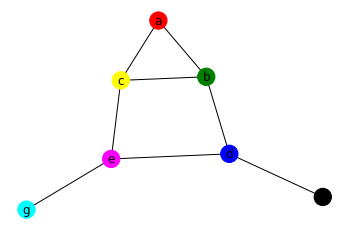

In [11]:
#隣接行列
g = np.array([
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0],
    [1, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0]
])
colors = ["red","green","yellow","blue","magenta","black","cyan"]
nodes = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
G = nx.Graph()
G.add_nodes_from(nodes)
edges = []
for hi, hv  in enumerate(g):
    for wi, wv in enumerate(hv):
        if(wv):
            edges.append((nodes[hi], nodes[wi]))
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color = colors, with_labels=True)
plt.axis("off")
plt.show()

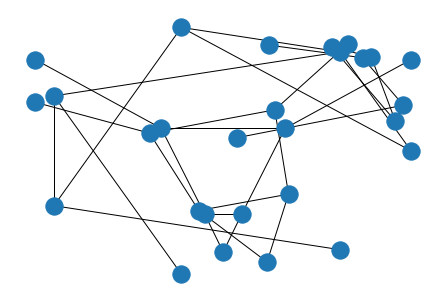

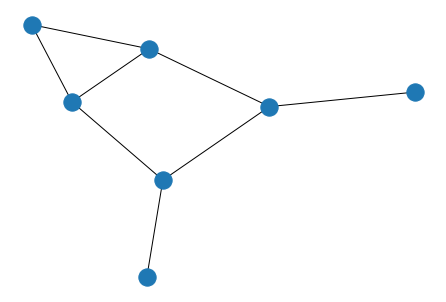

In [12]:
nx.draw(G)
nx.draw_random(G)
nx.draw_circular(G)
nx.draw_spectral(G)
plt.show()
#保存したい場合
nx.draw(G)
plt.savefig("path_to_fig.png")

In [10]:
#nx.draw(G)
#plt.savefig("path_to_fig.png")